##**Install and import libraries**

In [ ]:
!pip install visualkeras

In [ ]:
!pip install ann_visualizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist

In [ ]:
from ann_visualizer.visualize import ann_viz
import visualkeras

##**Import MNIST Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"X_train size : {X_train.shape}")
print(f"X_test size : {X_test.shape}")

X_train size : (60000, 28, 28)
X_test size : (10000, 28, 28)


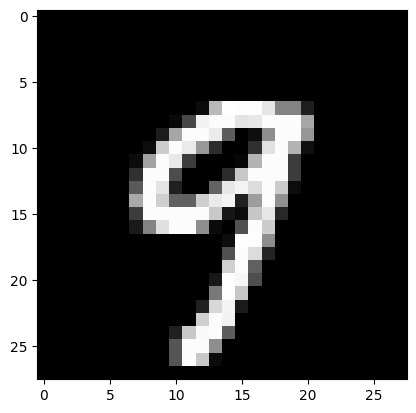

In [ ]:
plt.imshow(X_train[45], cmap = 'gray')

In [ ]:
X_train[45].dtype

dtype('uint8')

##**Reshape** the data into a Tensor and data type to float32

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train.dtype

dtype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train[45]

##**One Hot Encode** the categories

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train[45]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##**Build Sequential CNN model**

In [ ]:
model = Sequential([
    Convolution2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPool2D(pool_size = (2,2)),
    Convolution2D(32,(3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

##**Visualize the NN**

In [ ]:
ann_viz(model, view = True, filename = 'CNN', title = "CNN - MNIST")

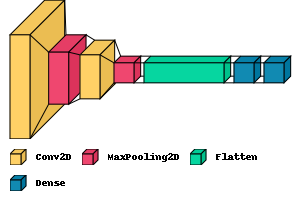

In [ ]:
visualkeras.layered_view(model, legend = True)

In [ ]:
from keras.utils import plot_model

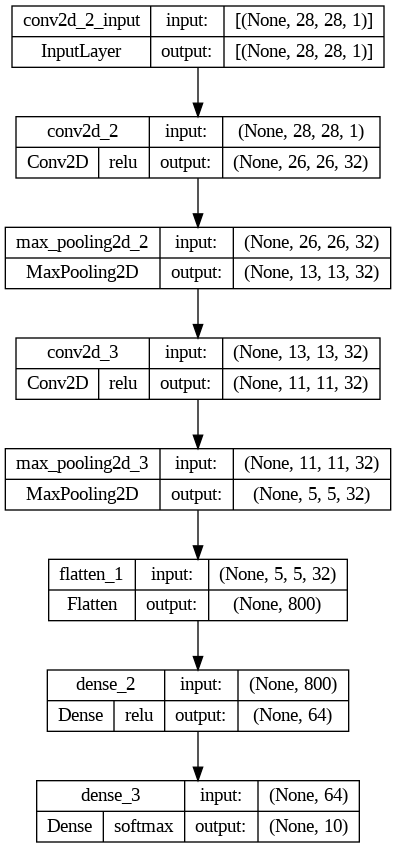

In [ ]:
plot_model(model, show_shapes = True, show_dtype = False, to_file = 'MLP.png', show_layer_names = True, expand_nested =True, dpi = 96, layer_range = None, show_layer_activations = True)

##**Train the Model**

In [ ]:
model.fit(X_train, y_train, batch_size = 128, epochs = 200)

Epoch 1/200
469/469 [==============================] - 2s 5ms/step - loss: 0.3607 - accuracy: 0.8943
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2608 - accuracy: 0.9222
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2070 - accuracy: 0.9382
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1713 - accuracy: 0.9488
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1480 - accuracy: 0.9556
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1299 - accuracy: 0.9616
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1178 - accuracy: 0.9651
Epoch 8/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1079 - accuracy: 0.9674
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1002 - accuracy: 0.9698
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0944 - accura

In [ ]:
model_fit = model.fit(X_train, y_train, batch_size = 128, epochs = 50)

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 5/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0027 - accuracy: 0.9996
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9996
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.9997
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0025 - accuracy: 0.9997

##**Test model with test Dataset**

In [ ]:
y_pred = model.predict(X_test[np.newaxis,1])

1/1 [==============================] - 0s 255ms/step


In [ ]:
prediction = y_pred.argmax(axis = 1)

In [ ]:
print(prediction[0])

2


In [ ]:
img = (X_test[1]*255).reshape((28,28)).astype('uint8')

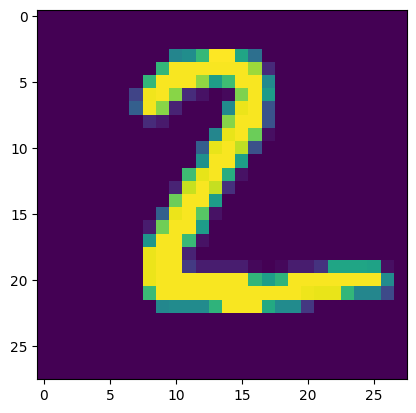

In [ ]:
plt.imshow(img)

1/1 [==============================] - 0s 18ms/step
[8]


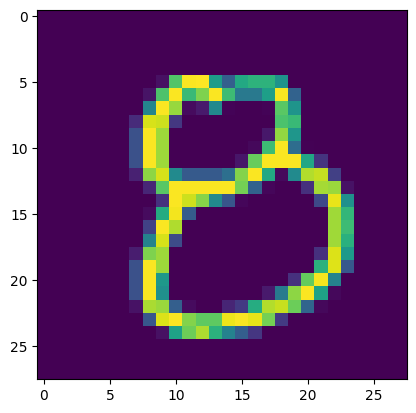

1/1 [==============================] - 0s 19ms/step
[2]


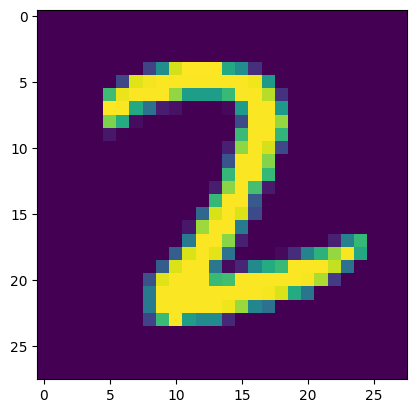

1/1 [==============================] - 0s 18ms/step
[6]


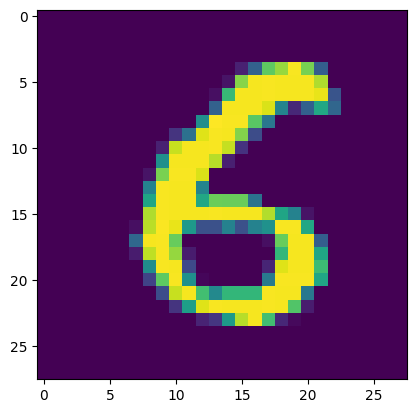

1/1 [==============================] - 0s 19ms/step
[6]


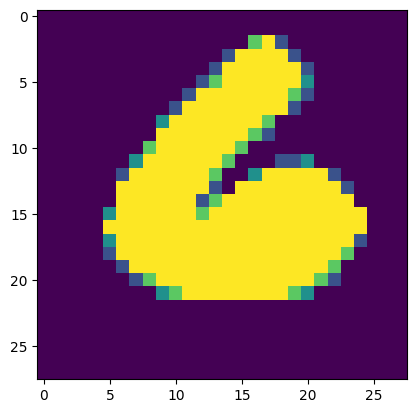

1/1 [==============================] - 0s 18ms/step
[6]


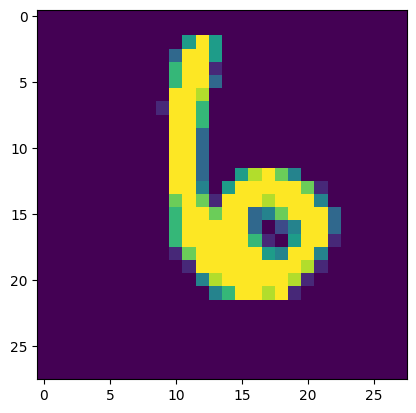

1/1 [==============================] - 0s 17ms/step
[5]


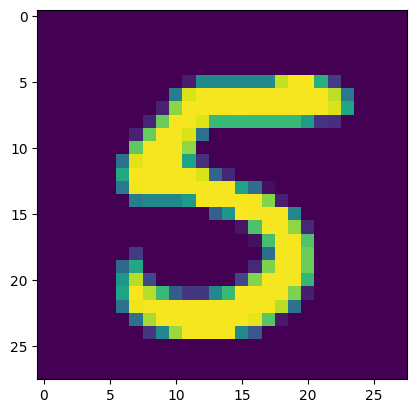

1/1 [==============================] - 0s 19ms/step
[7]


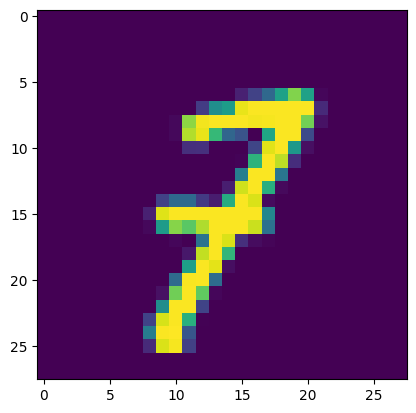

1/1 [==============================] - 0s 19ms/step
[6]


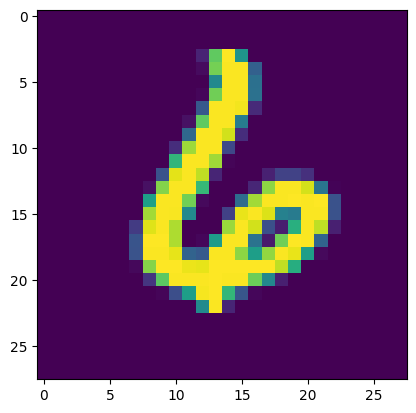

1/1 [==============================] - 0s 20ms/step
[8]


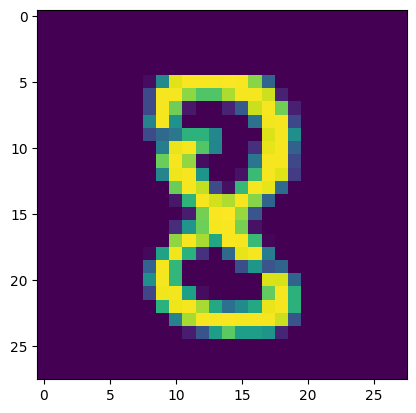

1/1 [==============================] - 0s 20ms/step
[7]


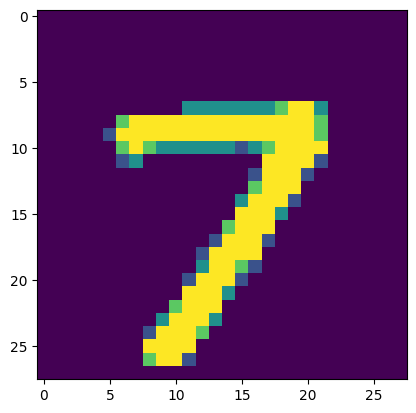

In [ ]:
for i in np.random.choice(np.arange(0,len(y_test)), size = (10,)):
  pred = model.predict(X_test[np.newaxis,i])
  prediction = pred.argmax(axis = 1)
  img = (X_test[i]*255).reshape((28,28)).astype('uint8')
  print(prediction)
  plt.imshow(img)
  plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(model_fit).plot(figsize = (8,5))
plt.grid(True)
plt.show()

ValueError: ignored

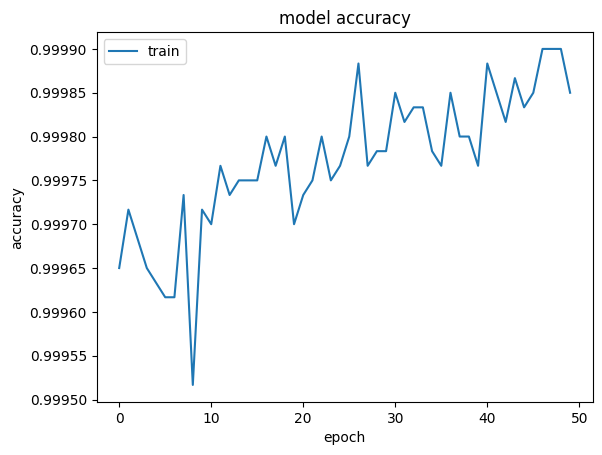

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

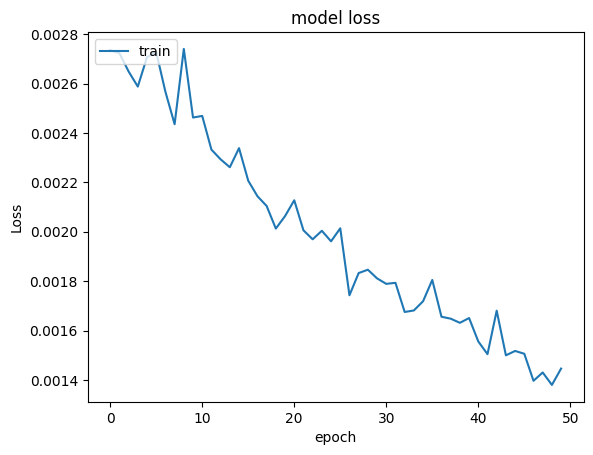

In [ ]:
plt.plot(model_fit.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()